In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = "https://www.aqi.in/in/world-most-polluted-countries"

import requests
from bs4 import BeautifulSoup
import urllib
import re


headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find_all('div',class_="aqi h-fit w-full text-[1.5rem] p-[0.5rem_0.5rem_0.3rem] rounded-[0.7rem] flex items-center justify-center text-white")  # Example class name, adjust as needed

for element in table:
    print(element.text)
    


244
221
185
161
129
69
57
81
111
122
130
173
200
130
98
88
92
68
65
68
124
134
154
162
159
125
115
112
108
85
69
66
77
109
154
148
86
78
115
102
99
127
107
106
142
95
68
117
136
124
107
124
104
79
58
58
78
89
114
126
125
98
91
96
99
94
86
71
91
82
61
109
60
70
86
87
87
110
113
109
107
80
86
83
72
68
71
84
87
99
92
102
116
97
81
104
98
87
78
74
87
64
64
65
133
82
96
143
129
153
139
125
82
40
40
46
26
58
87
108
144
124
112
94
72
54
57
65
106
67
50
92
152
148
116
93
84
51
49
44
42
24
47
110
115
107
102
88
77
65
58
62
68
88
90
110
86
119
129
146
84
46
42
46
81
72
74
83
132
110
75
71
48
51
47
50
98
80
100
132
78
36
44
47
67
52
52
66
152
102
64
104
166
144
102
79
77
53
49
56
49
37
42
112
87
81
81
77
71
60
58
71
114
90
48
116
130
118
84
66
64
53
50
56
67
59
73
131
118
135
123
106
68
56
51
21
26
42
63
95
84
70
70
85
89
85
70
77
97
47
47
83
85
76
105
55
50
60
59
54
57
43
81
151
65
67
69
67
70
71
67
80
84
73
69
105
40
54
74
78
78
72
66
84
79
91
72
101
34
0
84
65
65
66
65
69
79
76
83
101
109
94
7

In [3]:
import pandas as pd

# Base URL with a placeholder for page number
base_url = "https://www.iqair.com/world-most-polluted-countries"

# Output CSV file name
csv_filename = "polluted_cOUNTRIES.csv"

# Set how many pages you want to scrape (change this as needed)
max_pages = 1

# Create an empty DataFrame to store all data
all_data = pd.DataFrame()

# Loop through pages
for page in range(1, max_pages + 1):
    print(f"Scraping page {page}...")
    url = base_url.format(page)

    try:
        tables_list = pd.read_html(url)
    except ValueError:
        print("No table found on this page. Stopping.")
        break

    if not tables_list:
        print("No tables returned. Stopping.")
        break

    df = tables_list[0]

    # Drop index/serial number column if present
    if df.columns[0].lower() in ['#', 'rank', 'index']:
        df = df.iloc[:, 1:]

    # Append the full table to the cumulative DataFrame
    all_data = pd.concat([all_data, df], ignore_index=True)

print(f"\nScraping complete. Total rows collected: {len(all_data)}")

# Save to CSV without index
all_data.to_csv(csv_filename, index=False)
print(f"CSV file saved as '{csv_filename}'")

Scraping page 1...

Scraping complete. Total rows collected: 138
CSV file saved as 'polluted_cOUNTRIES.csv'


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL of the website
base_url = "https://www.aqi.in/in/world-most-polluted-countries"

# Headers to mimic a browser visit
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}

# Initialize an empty list to store all data
all_data = []

# Loop through the three pages
for page in range(1, 4):
    # Construct the URL for each page
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page}"

    # Send a GET request to the page
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve page {page}. Status code: {response.status_code}")
        continue

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all rows containing country data
    rows = soup.find_all('a', class_='location')

    if not rows:
        print(f"No data found on page {page}.")
        continue

    # Extract data from each row
    for row in rows:
        try:
            rank = row.find('p', class_='location-rank').get_text(strip=True).replace('.', '')
            country = row.find('div', class_='location-name').find('p').get_text(strip=True)
            aqi_values = [aqi.get_text(strip=True) for aqi in row.find_all('div', class_='aqi')]

            if len(aqi_values) >= 13:
                data = {
                    "Rank": rank,
                    "Country": country,
                    "2024 Avg": aqi_values[0],
                    "Jan": aqi_values[1],
                    "Feb": aqi_values[2],
                    "Mar": aqi_values[3],
                    "Apr": aqi_values[4],
                    "May": aqi_values[5],
                    "Jun": aqi_values[6],
                    "Jul": aqi_values[7],
                    "Aug": aqi_values[8],
                    "Sep": aqi_values[9],
                    "Oct": aqi_values[10],
                    "Nov": aqi_values[11],
                    "Dec": aqi_values[12],
                }
                all_data.append(data)
        except Exception as e:
            print(f"Error processing a row: {e}")
            continue

    # Pause between requests to be respectful to the server
    time.sleep(2)

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
df.to_csv("world_most_polluted_countries_.csv", index=False)
print("Data successfully saved to 'world_most_polluted_countries_.csv'.")


Data successfully saved to 'world_most_polluted_countries_.csv'.


In [5]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd

# Setup Selenium WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--headless")  # Run in headless mode (no UI)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Base URL of the website
base_url = "https://www.aqi.in/in/world-most-polluted-countries"

# Function to scrape data from a single page
def scrape_page(url):
    driver.get(url)
    time.sleep(3)  # Wait for the page to load
    
    # Locate the table rows for the countries' data
    rows = driver.find_elements(By.CLASS_NAME, 'location')
    
    data = []
    for row in rows:
        try:
            rank = row.find_element(By.CLASS_NAME, 'location-rank').text.strip().replace('.', '')
            country = row.find_element(By.CLASS_NAME, 'location-name').text.strip()
            aqi_values = [aqi.text.strip() for aqi in row.find_elements(By.CLASS_NAME, 'aqi')]
            
            if len(aqi_values) >= 13:
                data.append({
                    "Rank": rank,
                    "Country": country,
                    "2024 Avg": aqi_values[0],
                    "Jan": aqi_values[1],
                    "Feb": aqi_values[2],
                    "Mar": aqi_values[3],
                    "Apr": aqi_values[4],
                    "May": aqi_values[5],
                    "Jun": aqi_values[6],
                    "Jul": aqi_values[7],
                    "Aug": aqi_values[8],
                    "Sep": aqi_values[9],
                    "Oct": aqi_values[10],
                    "Nov": aqi_values[11],
                    "Dec": aqi_values[12]
                })
        except Exception as e:
            print(f"Error processing a row: {e}")
            continue
    return data

# Initialize an empty list to store all data
all_data = []

# Loop through the pages
for page in range(1, 4):  # 3 pages (page 1, 2, and 3)
    print(f"Scraping page {page}...")
    if page == 1:
        url = base_url
    else:
        url = f"{base_url}?page={page}"

    try:
        page_data = scrape_page(url)
        all_data.extend(page_data)
        print(f"Successfully scraped {len(page_data)} entries from page {page}.")
    except Exception as e:
        print(f"Error scraping page {page}: {e}")

# Close the browser
driver.quit()

# Create a DataFrame from the collected data
df = pd.DataFrame(all_data)

# Save the DataFrame to a CSV file
df.to_csv("world_most_polluted_countries_2024.csv", index=False)
print("Data successfully saved to 'world_most_polluted_countries_2024.csv'.")


Scraping page 1...
Successfully scraped 50 entries from page 1.
Scraping page 2...
Successfully scraped 50 entries from page 2.
Scraping page 3...
Successfully scraped 50 entries from page 3.
Data successfully saved to 'world_most_polluted_countries_2024.csv'.


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the article
url = "https://indianexpress.com/article/trending/top-10-listing/top-10-indian-cities-with-the-best-and-worst-aqi-in-2025-9770731/"

# Step 1: Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Step 2: Find all tables
tables = soup.find_all('table')
print(f"Number of tables found: {len(tables)}")

# Step 3: Safety check
if len(tables) < 2:
    print("Error: Less than 2 tables found. Cannot proceed with parsing cleanest and polluted city tables.")
    exit()

# Step 4: Extract the tables
cleanest_table = tables[0]
polluted_table = tables[1]

# Step 5: Parsing function
def parse_table(table):
    rows = table.find_all('tr')
    data = []
    for row in rows[1:]:  # Skip header
        cols = row.find_all(['td', 'th'])
        cols = [ele.get_text(strip=True) for ele in cols]
        if len(cols) >= 4:
            data.append({
                'Rank': cols[0],
                'City': cols[1],
                'State': cols[2],
                'AQI': cols[3]
            })
    return data

# Step 6: Extract and convert to DataFrames
cleanest_data = parse_table(cleanest_table)
polluted_data = parse_table(polluted_table)

df_cleanest = pd.DataFrame(cleanest_data)
df_polluted = pd.DataFrame(polluted_data)

# Step 7: Save to CSV
df_cleanest.to_csv('top_10_cleanest_cities_2025.csv', index=False)
df_polluted.to_csv('top_10_polluted_cities_2025.csv', index=False)

# Step 8: Print result
print("\nTop 10 Cleanest Indian Cities:\n", df_cleanest)
print("\nTop 10 Most Polluted Indian Cities:\n", df_polluted)


Number of tables found: 2

Top 10 Cleanest Indian Cities:
   Rank         City              State AQI
0    1  Tirunelveli         Tamil Nadu  33
1    2   Naharlagun  Arunachal Pradesh  43
2    3     Madikeri          Karnataka  44
3    4   Vijayapura          Karnataka  47
4    5    Thanjavur         Tamil Nadu  47
5    6       Koppal          Karnataka  55
6    7     Varanasi      Uttar Pradesh  55
7    8     Hubballi          Karnataka  56
8    9       Kannur             Kerala  56
9   10        Chhal       Chhattisgarh  56

Top 10 Most Polluted Indian Cities:
   Rank           City             State  AQI
0    1          Delhi             Delhi  357
1    2      Ghaziabad     Uttar Pradesh  332
2    3       Byrnihat         Meghalaya  303
3    4     Chandigarh        Chandigarh  302
4    5          Hapur     Uttar Pradesh  287
5    6        Dhanbad         Jharkhand  277
6    7          Baddi  Himachal Pradesh  276
7    8  Greater Noida     Uttar Pradesh  270
8    9      Kunjemura    

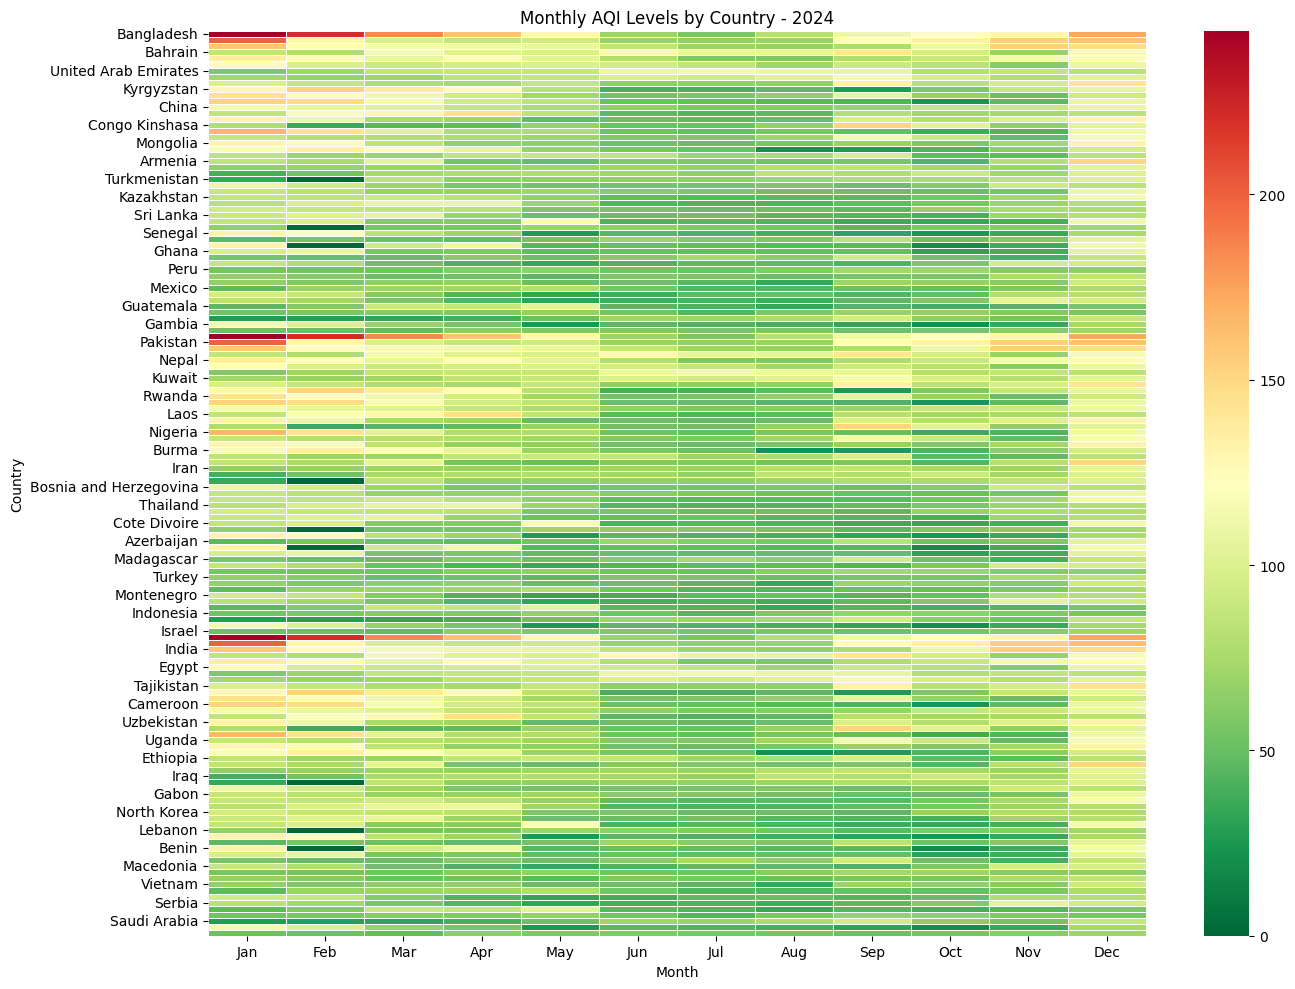

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('world_most_polluted_countries_2024.csv')

# Extract monthly columns
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Set country as index
df_heatmap = df.set_index('Country')[months]

# Plot heatmap without values
plt.figure(figsize=(14, 10))
sns.heatmap(df_heatmap, cmap="RdYlGn_r", linewidths=0.5)  # Removed annot and fmt
plt.title("Monthly AQI Levels by Country - 2024")
plt.xlabel("Month")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import folium

# Load the CSV file
df = pd.read_csv('AQI and Lat Long of Countries.csv', header=None)

# Assign column names if not present
df.columns = [
    'Country', 'City', 'AQI', 'AQI_Category', 'PM10', 'PM10_Category', 'PM2.5', 'PM2.5_Category',
    'O3', 'O3_Category', 'NO2', 'NO2_Category', 'Latitude', 'Longitude'
]

# Convert AQI to numeric, forcing errors to NaN (useful for invalid values)
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

# Drop rows where AQI is NaN
df = df.dropna(subset=['AQI'])

# Function to determine the color based on AQI value
def get_color(aqi):
    if aqi <= 50:
        return 'green'
    elif aqi <= 100:
        return 'yellow'
    elif aqi <= 150:
        return 'orange'
    elif aqi <= 200:
        return 'red'
    elif aqi <= 300:
        return 'purple'
    else:
        return 'maroon'

# Create the folium map, centered globally
m = folium.Map(location=[20, 0], zoom_start=2, tiles='cartodbpositron')

# Add CircleMarkers to the map based on the data
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=6,
        color=get_color(row['AQI']),
        fill=True,
        fill_color=get_color(row['AQI']),
        fill_opacity=0.8,
        popup=folium.Popup(
            f"<b>City:</b> {row['City']}<br>"
            f"<b>Country:</b> {row['Country']}<br>"
            f"<b>AQI:</b> {row['AQI']}<br>"
            f"<b>Category:</b> {row['AQI_Category']}<br>"
            f"<b>PM2.5:</b> {row['PM2.5']} ({row['PM2.5_Category']})<br>"
            f"<b>PM10:</b> {row['PM10']} ({row['PM10_Category']})<br>"
            f"<b>O3:</b> {row['O3']} ({row['O3_Category']})<br>"
            f"<b>NO2:</b> {row['NO2']} ({row['NO2_Category']})<br>",
            max_width=300
        )
    ).add_to(m)

# Save the map to an HTML file
m.save('interactive_air_quality_map2.html')
